Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)
Epoch 1/300
391/391 [==============================] - 8s 17ms/step - loss: 2.1803 - accuracy: 0.2684 - val_loss: 1.4683 - val_accuracy: 0.4583
Epoch 2/300
391/391 [==============================] - 6s 16ms/step - loss: 1.4543 - accuracy: 0.4627 - val_loss: 1.3732 - val_accuracy: 0.5049
Epoch 3/300
391/391 [==============================] - 6s 16ms/step - loss: 1.2299 - accuracy: 0.5561 - val_loss: 1.0547 - val_accuracy: 0.6202
Epoch 4/300
391/391 [==============================] - 6s 16ms/step - loss: 1.0735 - accuracy: 0.6185 - val_loss: 0.9027 - val_accuracy: 0.6859
Epoch 5/300
391/391 [==============================] - 6s 16ms/step - loss: 0.9710 - accuracy: 0.6578 - val_loss: 0.8357 - val_accuracy: 0.7032
Epoch 6/300
391/391 [==============================] - 6s 16ms/step - loss: 0.8811 - accuracy: 0.6914 - val_loss: 0.7662 - val_accuracy: 0.7336
Epoch 7/300
391/391 [=============================

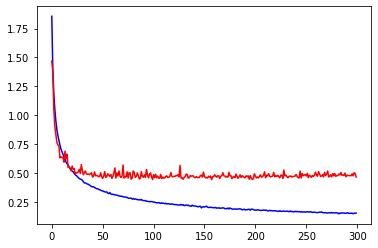

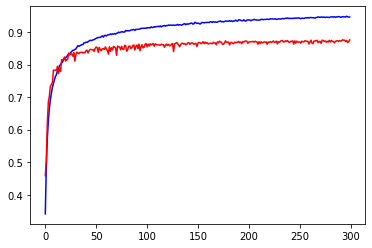

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1000
           1       0.95      0.93      0.94      1000
           2       0.85      0.80      0.83      1000
           3       0.79      0.71      0.75      1000
           4       0.82      0.89      0.85      1000
           5       0.83      0.80      0.81      1000
           6       0.87      0.93      0.90      1000
           7       0.91      0.92      0.92      1000
           8       0.91      0.95      0.93      1000
           9       0.93      0.93      0.93      1000

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000
 samples avg       0.88      0.88      0.88     10000



In [ ]:
# keras imports for the dataset and building our neural network
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.utils import np_utils
from tensorflow.keras import regularizers
from keras.regularizers import l2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import os

# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# # building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization(momentum=0.8))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# convolutional layer
model.add(Conv2D(175, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(300, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dropout(0.45))
model.add(Dense(250, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization(momentum=0.8))
model.add(Dropout(0.2))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

# training the model for 10 epochs
history = model.fit(X_train, Y_train, batch_size=128, epochs=300, shuffle=True, validation_data=(X_test, Y_test))



plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.show()
plt.plot(history.history['accuracy'], color='b')
plt.plot(history.history['val_accuracy'], color='r')
plt.show()


pred = model.predict(X_test)
pred = np.argmax(pred, axis= 1)
pred = tf.keras.utils.to_categorical(pred, num_classes= 10)


from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))